In [0]:
!rm -rf 'sample_data'

**Importing:**

In [0]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
!pip install scorecardpy
import scorecardpy as sc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

    100% |████████████████████████████████| 61kB 2.4MB/s 
  Stored in directory: /root/.cache/pip/wheels/9d/bb/1b/057d286ee8ebb34714b4004b13f4dc71b619b41f7868cf6f98
Successfully built scorecardpy


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
mdfm = pd.read_csv("/content/gdrive/My Drive/MergedDataFM/mergedataFM.csv")

**Key:**

**CREDIT SCORE -** A number, prepared by third parties, summarizing
the borrower’s creditworthiness, which may be indicative of the
likelihood that the borrower will timely repay future obligations.
Generally, the credit score disclosed is the score known at the time of
acquisition and is the score used to originate the mortgage.

**FIRST PAYMENT DATE -** The date of the first scheduled mortgage
payment due under the terms of the mortgage note.

**MATURITY DATE -** The month in which the final monthly payment on
the mortgage is scheduled to be made as stated on the original
mortgage note.

**MORTGAGE INSURANCE PERCENTAGE (MI %) -** The percentage
of loss coverage on the loan, at the time of Freddie Mac’s purchase of
the mortgage loan that a mortgage insurer is providing to cover losses
incurred as a result of a default on the loan. Only primary mortgage
insurance that is purchased by the Borrower, lender or Freddie Mac is
disclosed. Mortgage insurance that constitutes “credit enhancement”
that is not required by Freddie Mac’s Charter is not disclosed.
Amounts of mortgage insurance reported by Sellers that are less than
1% or greater than 55% will be disclosed as “Not Available,” which will
be indicated 999. No MI will be indicated by three zeros.

**ORIGINAL COMBINED LOAN-TO-VALUE (CLTV) –** In the case of a
purchase mortgage loan, the ratio is obtained by dividing the original
mortgage loan amount on the note date plus any secondary mortgage
loan amount disclosed by the Seller by the lesser of the mortgaged
property’s appraised value on the note date or its purchase price. In
the case of a refinance mortgage loan, the ratio is obtained by dividing
the original mortgage loan amount on the note date plus any
secondary mortgage loan amount disclosed by the Seller by the
mortgaged property’s appraised value on the note date. If the
secondary financing amount disclosed by the Seller includes a home
equity line of credit, then the CLTV calculation reflects the disbursed
amount at closing of the first lien mortgage loan, not the maximum
loan amount available under the home equity line of credit. In the
case of a seasoned mortgage loan, if the Seller cannot warrant that
the value of the mortgaged property has not declined since the note
date, Freddie Mac requires that the Seller must provide a new
appraisal value, which is used in the CLTV calculation. In certain
cases, where the Seller delivered a loan to Freddie Mac with a special
code indicating additional secondary mortgage loan amounts, those
amounts may have been included in the CLTV calculation.
If the LTV is < 80 or > 200 or Not Available, set the CLTV to ‘Not
Available.’ If the CLTV is < LTV, set the CLTV to ‘Not Available.’
This disclosure is subject to the widely varying standards originators
use to verify Borrowers’ secondary mortgage loan amounts and will
not be updated.

**ORIGINAL DEBT-TO-INCOME (DTI) RATIO -** Disclosure of the debt
to income ratio is based on (1) the sum of the borrower's monthly debt
payments, including monthly housing expenses that incorporate the
mortgage payment the borrower is making at the time of the delivery
of the mortgage loan to Freddie Mac, divided by (2) the total monthly
income used to underwrite the loan as of the date of the origination of
the such loan.
Ratios greater than 65% are indicated that data is Not Available. All
loans in the HARP dataset will be disclosed as Not Available.
This disclosure is subject to the widely varying standards originators
use to verify Borrowers’ assets and liabilities and will not be updated. 

**ORIGINAL UPB -** The UPB of the mortgage on the note date. UPB = Unpaid Principal Balance, this is the portion of the loan at a certain point in time that has not yet been remitted to the lender.Amount will be rounded to  the nearest $1,000.

**ORIGINAL LOAN-TO-VALUE (LTV) -** In the case of a purchase
mortgage loan, the ratio obtained by dividing the original mortgage
loan amount on the note date by the lesser of the mortgaged
property’s appraised value on the note date or its purchase price.
In the case of a refinance mortgage loan, the ratio obtained by dividing
the original mortgage loan amount on the note date and the
mortgaged property’s appraised value on the note date.
In the case of a seasoned mortgage loan, if the Seller cannot warrant
that the value of the mortgaged property has not declined since the
note date, Freddie Mac requires that the Seller must provide a new
appraisal value, which is used in the LTV calculation.

**ORIGINAL INTEREST RATE -** The original note rate as indicated on
the mortgage note.

**PREPAYMENT PENALTY MORTGAGE (PPM) FLAG -** Denotes
whether the mortgage is a PPM. A PPM is a mortgage with respect to
which the borrower is, or at any time has been, obligated to pay a
penalty in the event of certain repayments of principal.

Y = PPM
N = Not PPM

**PROPERTY STATE -** A two-letter abbreviation indicating the state or
territory within which the property securing the mortgage is located.

**PROPERTY TYPE -** Denotes whether the property type secured by
the mortgage is a condominium, leasehold, planned unit development
(PUD), cooperative share, manufactured home, or Single Family
home.
If the Property Type is Not Available, this will be indicated by 99. 

**LOAN SEQUENCE NUMBER -** Unique identifier assigned to each
loan. 

**ORIGINAL LOAN TERM -** A calculation of the number of scheduled
monthly payments of the mortgage based on the First Payment Date
and Maturity Date.

**SERVICER NAME -** The entity acting in its capacity as the servicer of
mortgages to Freddie Mac as of the last period for which loan activity
is reported in the Dataset.
Servicer Name will be disclosed for servicers with a total Original UPB
representing 1% or more of the total Original UPB of all loans in the
Dataset for a given calendar quarter. Otherwise, the Servicer Name
will be set to “Other Servicers”.

**Default -** Creating default value "1" or "0" on current loan deliquency status that are >= 6 and on zero balance code that = 2, 3, 9, 15.

In [0]:
indexNames = mdfm[mdfm['FirstPaymentDate'] >= 201500 ].index
mdfm.drop(indexNames , inplace=True)

In [0]:
mdfm['PPMFlag'] = np.where(mdfm['PPMFlag'] == 'N', '0', '1')

In [0]:
mdfm.sort_values("FirstPaymentDate", inplace = True)
mdfm.head(449798)

,CreditScore,FirstPaymentDate,MaturityDate,MortgageInsurancePercentage,OroginalCLTV,OriginalDTIRatio,OriginalUPB,OriginalLTV,OriginalInterestRate,PPMFlag,PropertyState,PropertyType,LoanSequenceNumber,OriginalLoanTerm,ServiceName,Default
5078,733,200002,203001,25,90,29,81000,90,7.875,0,OK,SF,F100Q1054119,360,Other servicers,0
5957,728,200002,203001,0,80,41,74000,80,7.500,0,MI,SF,F100Q1063451,360,FIFTHTHIRDBANK,0
4162,659,200002,203001,0,80,18,110000,80,8.125,0,MA,SF,F100Q1044618,360,WELLSFARGOHOMEMORTGA,0
8839,700,200002,203001,0,80,25,193000,80,7.875,0,NY,SF,F100Q1094828,360,ABNAMROMTGEGROUP_INC,0
5072,739,200002,203001,0,80,39,140000,80,7.625,0,MI,SF,F100Q1054070,360,Other servicers,0
3999,667,200002,203001,0,61,28,57000,61,8.500,0,MO,SF,F100Q1042792,360,Other servicers,0
5546,757,200002,203001,17,90,20,106000,90,8.000,0,IN,PU,F100Q1059195,360,BANKOFAMERICA_NA,0
1031,725,200002,203001,25,95,34,128000,95,7.875,0,WA,SF,F100Q1011441,360,WELLSFARGOHOMEMORTGA,0
600,778,200002,203001,0,75,29,121000,75,7.875,0,DE,PU,F100Q1006541,360,WASHINGTONMUTUALBANK,0
8567,755,200002,203001,16,95,28,52000,95,7.875,0,FL,SF,F100Q1092048,360,WELLSFARGOHOMEMORTGA,0


**Exploratory Data Analysis:**

In [0]:
##Reordering the columns
mdfm = mdfm [['LoanSequenceNumber',         ## 1
              'FirstPaymentDate',           ## 2
              'MaturityDate',               ## 3
              'CreditScore',                ## 4
              'MortgageInsurancePercentage',## 5
              'OroginalCLTV',               ## 6
              'OriginalDTIRatio',           ## 7
              'OriginalUPB',                ## 8
              'OriginalLTV',                ## 9
              'OriginalInterestRate',       ## 10
              'OriginalLoanTerm',           ## 11
              'PPMFlag',                    ## 12
              'PropertyState',              ## 13
              'PropertyType',               ## 14
              'ServiceName',                ## 15              
              'Default']]                   ## 16
mdfm.head(1)

,LoanSequenceNumber,FirstPaymentDate,MaturityDate,CreditScore,MortgageInsurancePercentage,OroginalCLTV,OriginalDTIRatio,OriginalUPB,OriginalLTV,OriginalInterestRate,OriginalLoanTerm,PPMFlag,PropertyState,PropertyType,ServiceName,Default
5078,F100Q1054119,200002,203001,733,25,90,29,81000,90,7.875,360,0,OK,SF,Other servicers,0


In [0]:
mdfm.shape

(391505, 16)

In [0]:
mdfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391505 entries, 5078 to 399865
Data columns (total 16 columns):
LoanSequenceNumber             391505 non-null object
FirstPaymentDate               391505 non-null int64
MaturityDate                   391505 non-null int64
CreditScore                    391505 non-null int64
MortgageInsurancePercentage    391505 non-null int64
OroginalCLTV                   391505 non-null int64
OriginalDTIRatio               391505 non-null int64
OriginalUPB                    391505 non-null int64
OriginalLTV                    391505 non-null int64
OriginalInterestRate           391505 non-null float64
OriginalLoanTerm               391505 non-null int64
PPMFlag                        391505 non-null object
PropertyState                  391505 non-null object
PropertyType                   391505 non-null object
ServiceName                    391505 non-null object
Default                        391505 non-null int64
dtypes: float64(1), int64(10), 

**Null Values identifacation and cleaning:**

If the Max Value Below  is equal to 9999, 999 or 99 then a Null Value is present.

In [0]:
mdfm.describe()

,FirstPaymentDate,MaturityDate,CreditScore,MortgageInsurancePercentage,OroginalCLTV,OriginalDTIRatio,OriginalUPB,OriginalLTV,OriginalInterestRate,OriginalLoanTerm,Default
count,391505.000000,391505.000000,391505.000000,391505.000000,391505.000000,391505.000000,3.915050e+05,391505.000000,391505.000000,391505.000000,391505.000000
mean,200706.869616,203474.020503,757.822056,5.010621,73.137209,46.456574,1.848707e+05,71.953909,5.745478,332.910898,0.008485
std,449.476240,565.449890,452.057918,16.284440,18.094227,109.267614,1.032984e+05,17.590993,1.447963,63.850438,0.091724
min,200002.000000,201106.000000,300.000000,0.000000,6.000000,1.000000,6.000000e+03,6.000000,2.250000,60.000000,0.000000
25%,200302.000000,203012.000000,699.000000,0.000000,64.000000,26.000000,1.080000e+05,63.000000,4.500000,360.000000,0.000000
50%,200702.000000,203410.000000,747.000000,0.000000,78.000000,34.000000,1.610000e+05,77.000000,5.875000,360.000000,0.000000
75%,201101.000000,203901.000000,781.000000,0.000000,82.000000,43.000000,2.400000e+05,80.000000,6.625000,360.000000,0.000000
max,201412.000000,205704.000000,9999.000000,999.000000,999.000000,999.000000,1.129000e+06,999.000000,10.875000,604.000000,1.000000


In [0]:
##mdfm['MortgageInsurancePercentage'].value_counts()

In [0]:
##Drops 63 Cases
indexNames = mdfm[mdfm['MortgageInsurancePercentage'] == 999 ].index
mdfm.drop(indexNames , inplace=True)

In [0]:
##mdfm['OroginalCLTV'].value_counts()

In [0]:
##Drops 18 Cases
indexNames = mdfm[mdfm['OroginalCLTV'] == 999 ].index
mdfm.drop(indexNames , inplace=True)

In [0]:
##mdfm['OriginalLTV'].value_counts()

In [0]:
##Drops 14 Cases
indexNames = mdfm[mdfm['OriginalLTV'] == 999 ].index
mdfm.drop(indexNames , inplace=True)

In [0]:
##mdfm['PropertyType'].value_counts()

In [0]:
##Drops 23 Cases
mdfm.loc[mdfm['PropertyType'] == '99' , 'PropertyType'] = np.nan
mdfm.dropna(inplace=True)
##mdfm['PropertyType'].value_counts(dropna=False)

In [0]:
##mdfm['CreditScore'].value_counts()

In [0]:
##Edits 925 Cases of "CreditScore" to the mean
mdfm.loc[mdfm['CreditScore'] == 9999, 'CreditScore'] = np.nan
mdfm['CreditScore'].fillna((mdfm['CreditScore'].mean()), inplace=True)

In [0]:
##mdfm['OriginalDTIRatio'].value_counts()

In [0]:
##Edits 5032 Cases of "OriginalDTIRatio" to the mean
mdfm.loc[mdfm['OriginalDTIRatio'] == 999, 'OriginalDTIRatio'] = np.nan
mdfm['OriginalDTIRatio'].fillna((mdfm['OriginalDTIRatio'].mean()), inplace=True)

In [0]:
mdfm.describe()

,FirstPaymentDate,MaturityDate,CreditScore,MortgageInsurancePercentage,OroginalCLTV,OriginalDTIRatio,OriginalUPB,OriginalLTV,OriginalInterestRate,OriginalLoanTerm,Default
count,391403.000000,391403.000000,391403.000000,391403.000000,391403.000000,391403.000000,3.914030e+05,391403.000000,391403.000000,391403.000000,391403.00000
mean,200706.998002,203474.100487,736.035505,4.850900,73.099051,34.056155,1.848802e+05,71.925049,5.745085,332.905065,0.00847
std,449.442691,565.491815,54.620018,10.304851,17.099197,11.309967,1.033033e+05,16.825815,1.447803,63.856196,0.09164
min,200002.000000,201106.000000,300.000000,0.000000,6.000000,1.000000,6.000000e+03,6.000000,2.250000,60.000000,0.00000
25%,200302.000000,203012.000000,699.000000,0.000000,64.000000,26.000000,1.080000e+05,63.000000,4.500000,360.000000,0.00000
50%,200702.000000,203410.000000,746.000000,0.000000,78.000000,34.000000,1.610000e+05,77.000000,5.875000,360.000000,0.00000
75%,201101.000000,203901.000000,780.000000,0.000000,82.000000,42.000000,2.400000e+05,80.000000,6.625000,360.000000,0.00000
max,201412.000000,205704.000000,850.000000,52.000000,180.000000,65.000000,1.129000e+06,101.000000,10.875000,604.000000,1.00000


**Identifying Outliers:**

In [0]:
##Creates the pair plot (hashed out for load times) 
##sns.pairplot(mdfm.iloc[:,3:10])

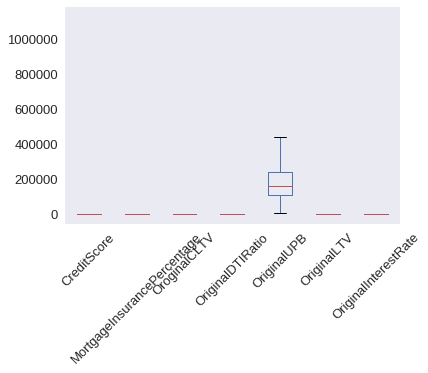

In [0]:
box = mdfm.iloc[:,3:10].boxplot(grid=False, rot=45, fontsize=13)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


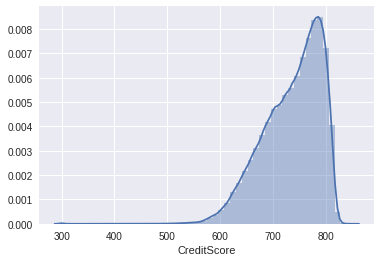

In [0]:
##Cut below 550 !Unknown!
sns.distplot(mdfm['CreditScore'])

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


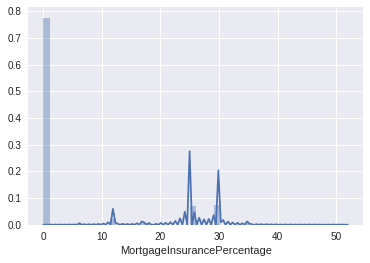

In [0]:
## !Unknown! Cut after 40
sns.distplot(mdfm['MortgageInsurancePercentage'])

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


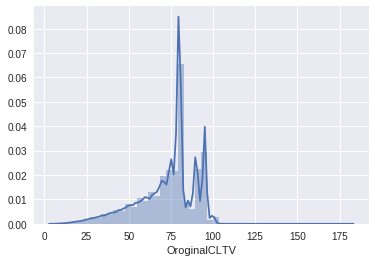

In [0]:
##Cut above 124
sns.distplot(mdfm['OroginalCLTV'])

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


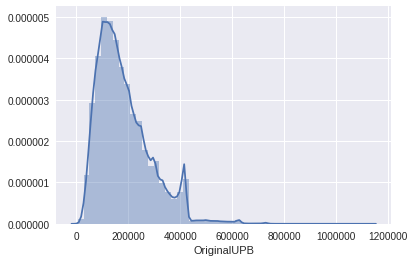

In [0]:
##Cut above 800000 !Unsure!
sns.distplot(mdfm['OriginalUPB'])

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


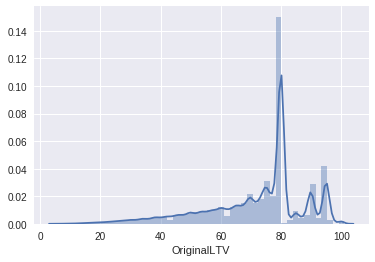

In [0]:
##Cut below 20
sns.distplot(mdfm['OriginalLTV'])

In [0]:
mdfm = mdfm.loc[(mdfm['CreditScore'] >= 550) 
                & (mdfm['MortgageInsurancePercentage'] <= 40) 
                & (mdfm['OroginalCLTV'] <= 124)
                & (mdfm['OriginalUPB'] <= 800000)
                & (mdfm['OriginalLTV'] >= 20)
                & (mdfm['OriginalInterestRate'] <= 10)]

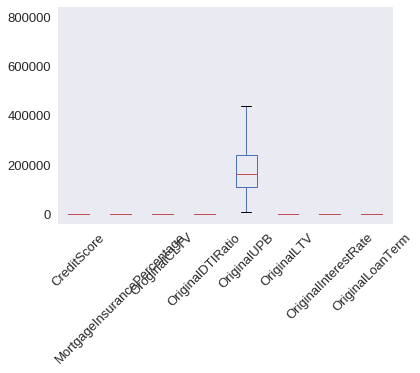

In [0]:
box = mdfm.iloc[:,3:11].boxplot(grid=False, rot=45, fontsize=13)

**Percentage of Defaults:**

In [0]:
count_no_Def = len(mdfm[mdfm['Default']==0])
count_Def = len(mdfm[mdfm['Default']==1])
pct_of_no_Def = count_no_Def/(count_no_Def+count_Def)
print("Percentage of no Default is", pct_of_no_Def*100)
pct_of_Def = count_Def/(count_no_Def+count_Def)
print("Percentage of Default", pct_of_Def*100)

Percentage of no Default is 99.15568899280058
Percentage of Default 0.8443110071994315


**Creating a Training and Test Datasets:**

In [0]:
train, test = sc.split_df(mdfm.iloc[:,3:],##:,3:16
                          y = 'Default',
                          ratio = 0.7, seed = 28845617).values()
train.head()

,CreditScore,MortgageInsurancePercentage,OroginalCLTV,OriginalDTIRatio,OriginalUPB,OriginalLTV,OriginalInterestRate,OriginalLoanTerm,PPMFlag,PropertyState,PropertyType,ServiceName,Default
1,698.0,0,78,25.0,124000,78,6.250,330,0,OH,SF,Other servicers,0
2,708.0,25,88,38.0,156000,88,6.125,330,0,WI,SF,Other servicers,0
4,734.0,17,90,40.0,151000,90,8.000,360,0,FL,SF,CHASEMTGECO,0
5,756.0,0,79,9.0,130000,79,8.000,360,0,OK,SF,BANKOFAMERICA_NA,0
6,652.0,25,90,19.0,206000,90,8.250,360,0,FL,SF,WELLSFARGOHOMEMORTGA,0


**Checking for independence between features:**

In [0]:
train.corr()

,CreditScore,MortgageInsurancePercentage,OroginalCLTV,OriginalDTIRatio,OriginalUPB,OriginalLTV,OriginalInterestRate,OriginalLoanTerm,Default
CreditScore,1.000000,-0.168552,-0.196260,-0.183941,0.129629,-0.202157,-0.375231,-0.179250,-0.086747
MortgageInsurancePercentage,-0.168552,1.000000,0.539616,0.084123,-0.076570,0.582092,0.162007,0.164391,0.025776
OroginalCLTV,-0.196260,0.539616,1.000000,0.131063,0.031536,0.963373,0.186975,0.266858,0.035688
OriginalDTIRatio,-0.183941,0.084123,0.131063,1.000000,0.081463,0.126946,0.136703,0.140799,0.044066
OriginalUPB,0.129629,-0.076570,0.031536,0.081463,1.000000,0.005554,-0.284198,0.039088,0.008314
OriginalLTV,-0.202157,0.582092,0.963373,0.126946,0.005554,1.000000,0.192679,0.269269,0.035184
OriginalInterestRate,-0.375231,0.162007,0.186975,0.136703,-0.284198,0.192679,1.000000,0.450367,0.049334
OriginalLoanTerm,-0.179250,0.164391,0.266858,0.140799,0.039088,0.269269,0.450367,1.000000,0.029623
Default,-0.086747,0.025776,0.035688,0.044066,0.008314,0.035184,0.049334,0.029623,1.000000


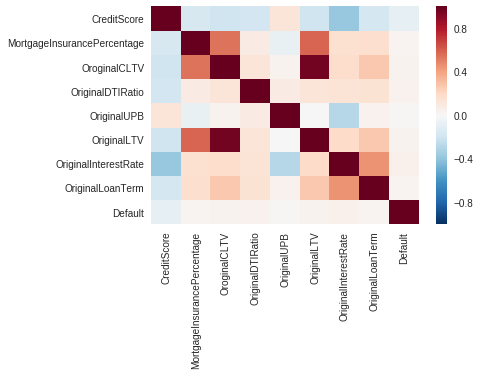

In [0]:
sns.heatmap(train.corr())

In [0]:
train = train.drop(['OroginalCLTV'],axis = 1)
test = test.drop(['OroginalCLTV'],axis = 1)

**Coding the Nominal Variables using Weights of Evidence (WoE):**

In [0]:
bins = sc.woebin(train, y = 'Default', 
                 min_perc_fine_bin=0.02, # How many bins to cut initially into
                 min_perc_coarse_bin=0.05,  # Minimum percentage per final bin
                 stop_limit=0.1, # Minimum information value 
                 max_num_bin=8, # Maximum number of bins
                 method='tree')

>>> There are 2 variables have too many unique non-numberic values, which might cause the binning process slow. Please double check the following variables: 
PropertyState, ServiceName
>>> Continue the binning process?
1: yes 
2: no 

Selection: 1
Binning on 271855 rows and 12 columns in 00:00:19


{'CreditScore': <Figure size 432x288 with 2 Axes>,
 'MortgageInsurancePercentage': <Figure size 432x288 with 2 Axes>,
 'OriginalDTIRatio': <Figure size 432x288 with 2 Axes>,
 'OriginalInterestRate': <Figure size 432x288 with 2 Axes>,
 'OriginalLTV': <Figure size 432x288 with 2 Axes>,
 'OriginalLoanTerm': <Figure size 432x288 with 2 Axes>,
 'OriginalUPB': <Figure size 432x288 with 2 Axes>,
 'PPMFlag': <Figure size 432x288 with 2 Axes>,
 'PropertyState': <Figure size 432x288 with 2 Axes>,
 'PropertyType': <Figure size 432x288 with 2 Axes>,
 'ServiceName': <Figure size 432x288 with 2 Axes>}

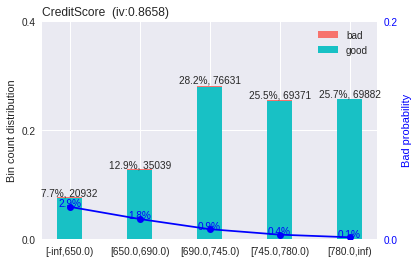

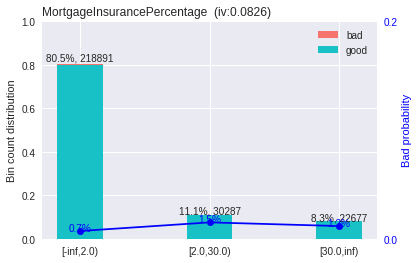

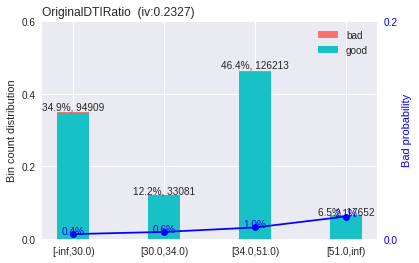

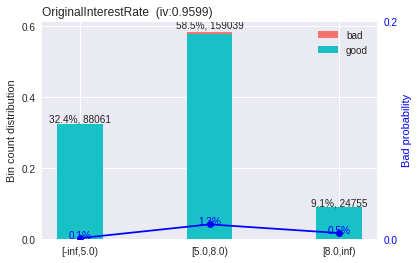

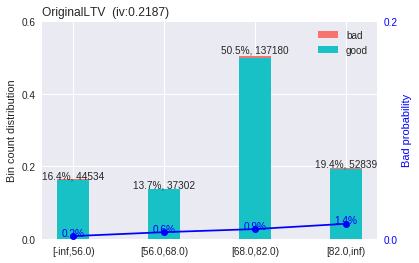

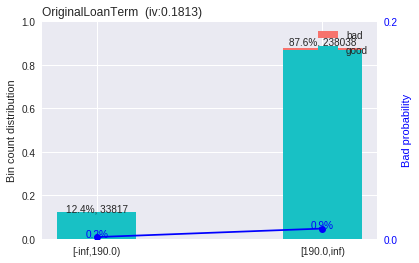

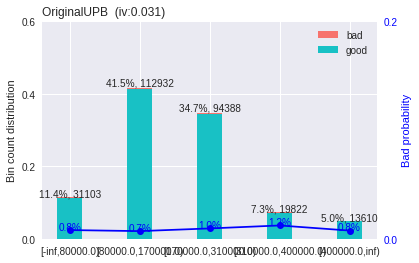

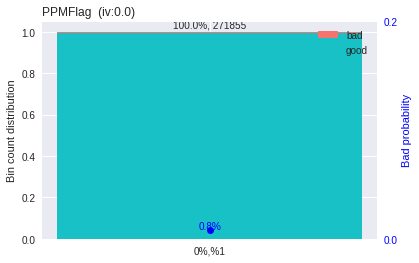

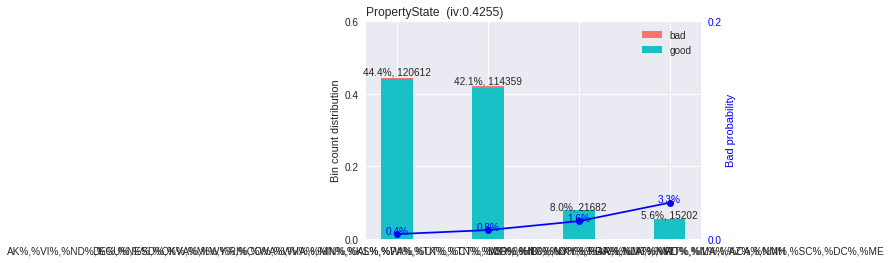

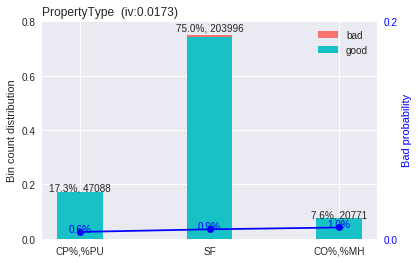

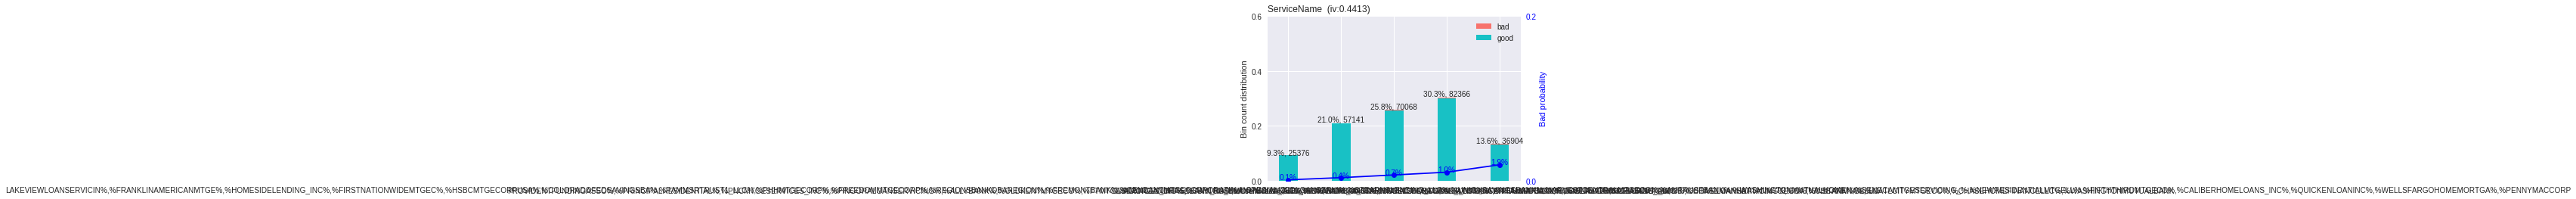

In [0]:
sc.woebin_plot(bins)

In [0]:
##breaks_adj = sc.woebin_adj(train, "Default", bins)

In [0]:
##The breaks for woe as found by the Manual Bin
breaks_adj = {'CreditScore': [650.0,690.0,745.0,780.0],
              'MortgageInsurancePercentage': [2.0,30.0],
              'OriginalDTIRatio':[30.0,34.0,51.0],
              'OriginalInterestRate':[4.0,5.0],
              'OriginalLTV':[56.0,68.0,82.0],
              'OriginalLoanTerm':[190.0],##250.0
              'OriginalUPB':[70000.0,170000.0,260000.0,400000.0],
              'PPMFlag':['0', '1'],
              'PropertyState':['AK%,%VI%,%GU%,%ND%,%VA%,%KS%,%NE%,%MN%,%CO%,%MO%,%SD%,%WY%,%VT%,%TX%,%TN%,%NC%,%KY%,%WI%,%AR%,%CA%,%NH','DE%,%AL%,%MA%,%IA%,%WA%,%WV%,%MI%,%OR%,%IN%,%UT%,%PA%,%RI%,%OK%,%CT%,%MT%,%IL%,%OH%,%GA%,%MD%,%AZ%,%ID%,%MS%,%LA','ME%,%DC%,%SC%,%NM%,%HI%,%NY%,%NJ%,%NV','PR%,%FL'],
              'PropertyType': ['CP%,%PU','SF','CO%,%MH'],
              'ServiceName': ['LAKEVIEWLOANSERVICIN%,%HOMEPOINTFINANCIALCO%,%IMPACMTGECORP%,%LOANDEPOTCOM_LLC%,%MATRIXFINANCIALSERVI%,%FREMONTBANK%,%FREEDOMMTGECORP%,%FRANKLINAMERICANMTGE%,%NEWRESIDENTIALMTGELL%,%FIRSTNATIONWIDEMTGEC%,%PAMMSRTRUST1_LLC%,%COLORADOFEDSAVINGSBA%,%HOMESIDELENDING_INC%,%PHHMTGECORP%,%COLONIALSAVINGS_FA%,%REGIONSBANKDBAREGION%,%SENECAMTGESERVICING_%,%CENDANTMTGECORPORATI%,%SPECIALIZEDLOANSERVI%,%STEARNSLENDING_LLC%,%UNIONSAVINGSBANK%,%ARVESTCENTRALMTGECO%,%AMTRUSTBANK%,%AMERIHOMEMTGECOMPANY%,%WASHINGTONMUTUALHOME%,%PODIUMMTGECAPITALLLC%,%HSBCMTGECORPUSA%,%QUICKENLOANINC'
                              ,'PENNYMACCORP%,%FIFTHTHIRDMTGECO%,%SUNTRUSTMORTGAGE_INC%,%WELLSFARGOHOMEMORTGA%,%PROVIDENTFUNDINGASSO%,%ROUNDPOINTMTGESERVIC%,%PINGORALOANSERVICING%,%CALIBERHOMELOANS_INC%,%PRINCIPALRESIDENTIAL'
                              ,'BRANCHBANKING&TRUSTC%,%OLDKENTMTGECO%,%ALLYBANK%,%FTMTGESERVICES_INC%,%COUNTRYWIDE%,%PNCBANK_NATL%,%WASHINGTONMUTUALBANK%,%CHASEMANHATTANMTGECO%,%USBANKNA%,%CHASEHOMEFINANCELLC%,%GMACMTGECORP%,%CHASEMTGECO%,%NATLCITYMTGECO'
                              ,'FIFTHTHIRDBANK%,%WELLSFARGOBANK_NA%,%TAYLOR_BEAN&WHITAKER%,%RUSHMORELOANMANAGEME%,%GMACMORTGAGE_LLC%,%ABNAMROMTGEGROUP_INC%,%PNCMTGESERVICES_INC%,%Other servicers%,%METLIFEHOMELOANS_ADI%,%CENTRALMTGECO%,%BANKOFAMERICA_NA'
                              ,'JPMORGANCHASEBANK_NA%,%CITIMORTGAGE_INC%,%NATIONSTARMTGELLCDBA%,%FLAGSTARCAPITALMARKE%,%OCWENLOANSERVICING_L%,%BACHOMELOANSERVICING%,%NATIONSTARMTGELLC' ]}

In [0]:
bins_adj = sc.woebin(train, y="Default", breaks_list=breaks_adj)
train_woe = sc.woebin_ply(train, bins_adj)
test_woe = sc.woebin_ply(test, bins_adj)

>>> There are 2 variables have too many unique non-numberic values, which might cause the binning process slow. Please double check the following variables: 
PropertyState, ServiceName
>>> Continue the binning process?
1: yes 
2: no 

Selection: 1
Binning on 271855 rows and 12 columns in 00:00:12


In [0]:
##train_woe.describe()

In [0]:
##train_woe.head()

**IV Values Key:**
- $IV < 0.02$: Remove.
- $0.02 \le IV < 0.1$: Remove.
- $0.1 \le IV < 0.3$: Keep.
- $0.3 \le IV < 1$: Keep.
- $1 \le IV $: Keep/Review. Study if error in calculation (i.e. WoE leaves a category with 100% goods or bads) or if variable is capturing future information.

In [0]:
sc.iv(train_woe, 'Default')

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,variable,info_value
5,OriginalInterestRate_woe,0.958711
3,CreditScore_woe,0.865809
1,ServiceName_woe,0.430943
2,PropertyState_woe,0.417614
6,OriginalDTIRatio_woe,0.232683
8,OriginalLTV_woe,0.218671
0,OriginalLoanTerm_woe,0.181279
10,MortgageInsurancePercentage_woe,0.082614
9,OriginalUPB_woe,0.027652
4,PropertyType_woe,0.017331


In [0]:
##Dropping IVs below 0.1
train_woe = train_woe.drop(['MortgageInsurancePercentage_woe','PPMFlag_woe',
                            'PropertyType_woe','OriginalUPB_woe',],axis = 1)
test_woe = test_woe.drop(['MortgageInsurancePercentage_woe','PPMFlag_woe',
                          'PropertyType_woe','OriginalUPB_woe',],axis = 1)
##train_woe.head()

In [0]:
##test_woe.head()

**Logistic Regression:**

In [0]:
mdfm_logregA = LogisticRegression(penalty='l1', # Type of penalization l1 = lasso, l2 = ridge
                                     tol=0.0001, # Tolerance for parameters
                                     C=1.0, # Penalty constant, see below
                                     fit_intercept=True, # Use constant?
                                     class_weight='balanced', # Weights, see below
                                     random_state=28845617, # Random seed
                                     max_iter=1000, # Maximum iterations
                                     verbose=1, # Show process. 1 is yes.
                                     solver = 'saga',
                                     warm_start=False) # Train anew or start from previous weights. For repeated training. 

In [0]:
mdfm_logregA.fit(X = train_woe.iloc[:,1:],y = train_woe['Default'])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 204 seconds


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.4min finished


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=1000,
          multi_class='warn', n_jobs=None, penalty='l1',
          random_state=28845617, solver='saga', tol=0.0001, verbose=1,
          warm_start=False)

In [0]:
coef_df = pd.concat([pd.DataFrame({'column': train_woe.columns[1:]}), 
                    pd.DataFrame(np.transpose(mdfm_logregA.coef_))],axis = 1)
coef_df

,column,0
0,OriginalInterestRate_woe,0.416581
1,ServiceName_woe,2.374908
2,OriginalLoanTerm_woe,0.485307
3,OriginalLTV_woe,2.741145
4,PropertyState_woe,0.606890
5,OriginalDTIRatio_woe,0.078245
6,CreditScore_woe,0.431576


In [0]:
mdfm_logregA.intercept_

array([-0.63996328])

In [0]:
pred_class_train_log = mdfm_logregA.predict(train_woe.iloc[:, 1:])
probs_train_log = mdfm_logregA.predict_proba(train_woe.iloc[:, 1:])
print(probs_train_log, pred_class_train_log)

[[0.56368657 0.43631343]
 [0.34029475 0.65970525]
 [0.4691869  0.5308131 ]
 ...
 [0.90262474 0.09737526]
 [0.34347122 0.65652878]
 [0.69299759 0.30700241]] [0 1 1 ... 0 1 0]


In [0]:
pred_class_test_log = mdfm_logregA.predict(test_woe.iloc[:, 1:])
probs_test_log = mdfm_logregA.predict_proba(test_woe.iloc[:, 1:])
print(probs_test_log, pred_class_test_log)

[[0.98897166 0.01102834]
 [0.65648577 0.34351423]
 [0.9806628  0.0193372 ]
 ...
 [0.45287247 0.54712753]
 [0.69299759 0.30700241]
 [0.95733414 0.04266586]] [0 0 0 ... 1 0 0]


In [0]:
confusion_matrix(y_true = test_woe['Default'], y_pred = pred_class_test_log)

array([[90827, 24698],
       [  331,   653]])

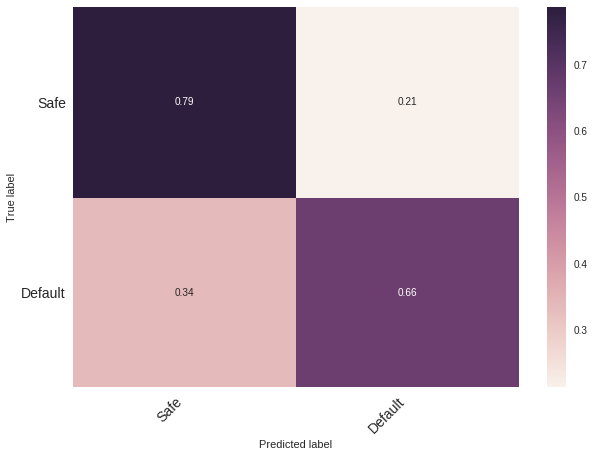

In [0]:
confusion_matrix_rf = confusion_matrix(y_true = test_woe['Default'], 
                    y_pred = pred_class_test_log)
confusion_matrix_rf = confusion_matrix_rf.astype('float') / confusion_matrix_rf.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(
        confusion_matrix_rf, index=['Safe', 'Default'], columns=['Safe', 'Default'],)
figsize = (10,7)
fontsize=14
fig = plt.figure(figsize=figsize)
heatmap = sns.heatmap(df_cm, annot=True, fmt='.2f')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, 
                             ha='right', fontsize=fontsize)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45,
                             ha='right', fontsize=fontsize)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [0]:
roc_auc_score(y_true = train_woe['Default'], y_score = probs_train_log[:,1])

0.8052607880962148

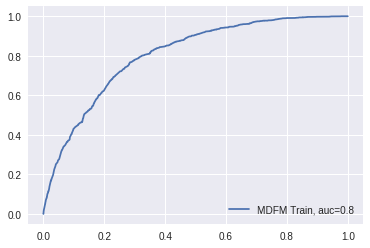

In [0]:
fpr, tpr, thresholds = roc_curve(train_woe['Default'], probs_train_log[:,1])
auc = np.round(roc_auc_score(y_true = test_woe['Default'], 
                             y_score = probs_test_log[:,1]),decimals = 3)
plt.plot(fpr,tpr,label="MDFM Train, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [0]:
roc_auc_score(y_true = test_woe['Default'], y_score = probs_test_log[:,1])

0.7995366152752634

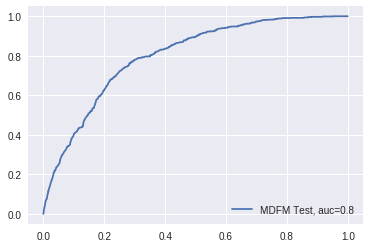

In [0]:
fpr, tpr, thresholds = roc_curve(test_woe['Default'], probs_test_log[:,1])
auc = np.round(roc_auc_score(y_true = test_woe['Default'], 
                             y_score = probs_test_log[:,1]),decimals = 3)
plt.plot(fpr,tpr,label="MDFM Test, auc="+str(auc))
plt.legend(loc=4)
plt.show()

**Scorecard:**

In [0]:
mdfm_sc = sc.scorecard(bins_adj, mdfm_logregA, 
             train_woe.columns[1:], # The column names in the trained LR
             points0=1000, # Base points
             odds0=0.01, # Base odds
             pdo=50) # PDO 

In [0]:
mdfm_sc

{'CreditScore':       variable            bin  points
 0  CreditScore   [-inf,650.0)   -40.0
 1  CreditScore  [650.0,690.0)   -24.0
 2  CreditScore  [690.0,745.0)    -2.0
 3  CreditScore  [745.0,780.0)    25.0
 4  CreditScore    [780.0,inf)    56.0,
 'OriginalDTIRatio':             variable          bin  points
 8   OriginalDTIRatio  [-inf,30.0)     4.0
 9   OriginalDTIRatio  [30.0,34.0)     2.0
 10  OriginalDTIRatio  [34.0,51.0)    -1.0
 11  OriginalDTIRatio   [51.0,inf)    -5.0,
 'OriginalInterestRate':                 variable         bin  points
 12  OriginalInterestRate  [-inf,4.0)   106.0
 13  OriginalInterestRate   [4.0,5.0)    68.0
 14  OriginalInterestRate   [5.0,inf)   -11.0,
 'OriginalLTV':        variable          bin  points
 15  OriginalLTV  [-inf,56.0)   242.0
 16  OriginalLTV  [56.0,68.0)    64.0
 17  OriginalLTV  [68.0,82.0)   -12.0
 18  OriginalLTV   [82.0,inf)   -98.0,
 'OriginalLoanTerm':             variable           bin  points
 19  OriginalLoanTerm  [-inf,190.0)

In [0]:
train_score = sc.scorecard_ply(train, mdfm_sc, 
                               print_step=0)
test_score = sc.scorecard_ply(test, mdfm_sc, 
                               print_step=0)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:621: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [0]:
train_score.describe()

,score
count,271855.000000
mean,824.898174
std,205.198029
min,352.000000
25%,680.000000
50%,791.000000
75%,949.000000
max,1739.000000


**Generating Dummies:**

**'ServiceName'**

In [0]:
pd.crosstab(train['ServiceName'], train['Default'])

Default,0,1
ServiceName,,
ABNAMROMTGEGROUP_INC,8549,66
ALLYBANK,1038,3
AMTRUSTBANK,77,0
ARVESTCENTRALMTGECO,95,0
BACHOMELOANSERVICING,1071,54
BANKOFAMERICA_NA,19578,206
BRANCHBANKING&TRUSTC,9565,35
CALIBERHOMELOANS_INC,815,1
CENDANTMTGECORPORATI,265,0


In [0]:
train.groupby('ServiceName', as_index=False).agg({'Default': ["mean"]})

,ServiceName,Default
,,mean
0,ABNAMROMTGEGROUP_INC,0.007661
1,ALLYBANK,0.002882
2,AMTRUSTBANK,0.000000
3,ARVESTCENTRALMTGECO,0.000000
4,BACHOMELOANSERVICING,0.048000
5,BANKOFAMERICA_NA,0.010412
6,BRANCHBANKING&TRUSTC,0.003646
7,CALIBERHOMELOANS_INC,0.001225
8,CENDANTMTGECORPORATI,0.000000


In [0]:
train['ServiceName'] = pd.get_dummies(train)

In [0]:
pd.crosstab(test['ServiceName'], test['Default'])

Default,0,1
ServiceName,,
ABNAMROMTGEGROUP_INC,3558,27
ALLYBANK,445,1
AMTRUSTBANK,33,0
ARVESTCENTRALMTGECO,54,0
BACHOMELOANSERVICING,490,19
BANKOFAMERICA_NA,8538,99
BRANCHBANKING&TRUSTC,4161,10
CALIBERHOMELOANS_INC,359,2
CENDANTMTGECORPORATI,84,0


In [0]:
test.groupby('ServiceName', as_index=False).agg({'Default': ["mean"]})

,ServiceName,Default
,,mean
0,ABNAMROMTGEGROUP_INC,0.007531
1,ALLYBANK,0.002242
2,AMTRUSTBANK,0.000000
3,ARVESTCENTRALMTGECO,0.000000
4,BACHOMELOANSERVICING,0.037328
5,BANKOFAMERICA_NA,0.011462
6,BRANCHBANKING&TRUSTC,0.002398
7,CALIBERHOMELOANS_INC,0.005540
8,CENDANTMTGECORPORATI,0.000000


In [0]:
test['ServiceName'] = pd.get_dummies(test)

**'PropertyState'**

In [0]:
pd.crosstab(train['PropertyState'], train['Default'])

Default,0,1
PropertyState,,
AK,629,0
AL,2956,21
AR,1517,8
AZ,6859,70
CA,31971,177
CO,6785,18
CT,2959,23
DC,535,6
DE,1002,6


In [0]:
train.groupby('PropertyState', as_index=False).agg({'Default': ["mean"]})

,PropertyState,Default
,,mean
0,AK,0.000000
1,AL,0.007054
2,AR,0.005246
3,AZ,0.010102
4,CA,0.005506
5,CO,0.002646
6,CT,0.007713
7,DC,0.011091
8,DE,0.005952


In [0]:
train['PropertyState'] = pd.get_dummies(train)

In [0]:
pd.crosstab(test['PropertyState'], test['Default'])

Default,0,1
PropertyState,,
AK,302,0
AL,1301,7
AR,713,3
AZ,3015,30
CA,13642,76
CO,2847,10
CT,1287,12
DC,235,1
DE,453,4


In [0]:
test.groupby('PropertyState', as_index=False).agg({'Default': ["mean"]})

,PropertyState,Default
,,mean
0,AK,0.000000
1,AL,0.005352
2,AR,0.004190
3,AZ,0.009852
4,CA,0.005540
5,CO,0.003500
6,CT,0.009238
7,DC,0.004237
8,DE,0.008753


In [0]:
test['PropertyState'] = pd.get_dummies(test)

**'PropertyType'**

In [0]:
pd.crosstab(train['PropertyType'], train['Default'])

Default,0,1
PropertyType,,
CO,18767,180
CP,597,2
MH,1788,36
PU,46193,296
SF,202215,1781


In [0]:
train.groupby('PropertyType', as_index=False).agg({'Default': ["mean"]})

,PropertyType,Default
,,mean
0,CO,0.009500
1,CP,0.003339
2,MH,0.019737
3,PU,0.006367
4,SF,0.008731


In [0]:
train['PropertyType'] = pd.get_dummies(train)

In [0]:
pd.crosstab(test['PropertyType'], test['Default'])

Default,0,1
PropertyType,,
CO,7961,81
CP,293,1
MH,742,17
PU,19803,126
SF,86726,759


In [0]:
test.groupby('PropertyType', as_index=False).agg({'Default': ["mean"]})

,PropertyType,Default
,,mean
0,CO,0.010072
1,CP,0.003401
2,MH,0.022398
3,PU,0.006322
4,SF,0.008676


In [0]:
test['PropertyType'] = pd.get_dummies(test)

**Random Forest:**

In [0]:
mdfm_rf = RandomForestClassifier(n_estimators=1000, # Number of trees to train
                       criterion='gini', # How to train the trees. Also supports entropy.
                       max_depth=None, # Max depth of the trees. Not necessary to change.
                       min_samples_split=2, # Minimum samples to create a split.
                       min_samples_leaf=0.001, # Minimum samples in a leaf. Accepts fractions for %. This is 0.1% of sample.
                       min_weight_fraction_leaf=0.0, # Same as above, but uses the class weights.
                       max_features='auto', # Maximum number of features per split (not tree!) by default is sqrt(vars)
                       max_leaf_nodes=None, # Maximum number of nodes.
                       min_impurity_decrease=0.0001, # Minimum impurity decrease. This is 10^-3.
                       bootstrap=True, # If sample with repetition. For large samples (>100.000) set to false.
                       oob_score=True,  # If report accuracy with non-selected cases.
                       n_jobs=-1, # Parallel processing. Set to -1 for all cores. Watch your RAM!!
                       random_state=28845617, # Seed
                       verbose=1, # If to give info during training. Set to 0 for silent training.
                       warm_start=False, # If train over previously trained tree.
                       class_weight='balanced')

In [0]:
mdfm_rf.fit(train.iloc[:,:-1], 
               train['Default'])

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   57.1s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  4.7min finished


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0001,
            min_impurity_split=None, min_samples_leaf=0.001,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=-1, oob_score=True,
            random_state=28845617, verbose=1, warm_start=False)

In [0]:
rf_pred_class_test = mdfm_rf.predict(test.iloc[:, :-1])
rf_probs_test = mdfm_rf.predict_proba(test.iloc[:, :-1])

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    1.6s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    3.7s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    6.5s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    8.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    1.6s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    3.7s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    6.5s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    8.2s finished


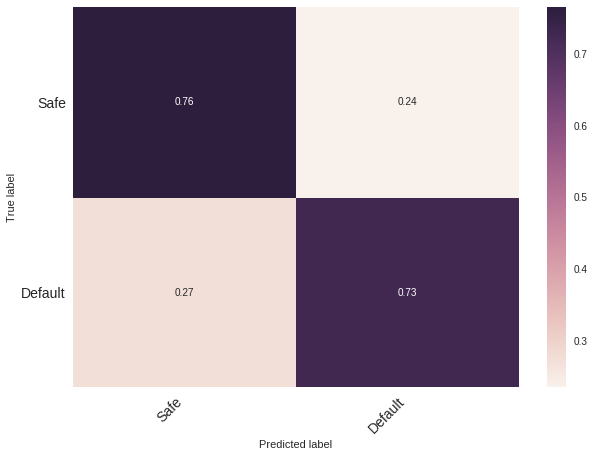

In [0]:
confusion_matrix_rf = confusion_matrix(y_true = test['Default'], 
                    y_pred = rf_pred_class_test)
confusion_matrix_rf = confusion_matrix_rf.astype('float') / confusion_matrix_rf.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(
        confusion_matrix_rf, index=['Safe', 'Default'], columns=['Safe', 'Default'],)
figsize = (10,7)
fontsize=14
fig = plt.figure(figsize=figsize)
heatmap = sns.heatmap(df_cm, annot=True, fmt='.2f')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, 
                             ha='right', fontsize=fontsize)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45,
                             ha='right', fontsize=fontsize)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [0]:
roc_auc_score(y_true = test['Default'], y_score = rf_probs_test[:,1])

0.8250275782350985

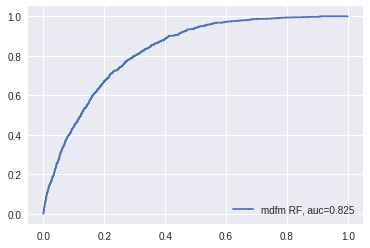

In [0]:
# Calculate the ROC curve points
fpr, tpr, thresholds = roc_curve(test['Default'], rf_probs_test[:,1])

# Save the AUC in a variable to display it. Round it first
auc = np.round(roc_auc_score(y_true = test['Default'], 
                             y_score = rf_probs_test[:,1]),
              decimals = 3)

# Create and show the plot
plt.plot(fpr,tpr,label="mdfm RF, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [0]:
for name, importance in zip(train.columns[:-1], mdfm_rf.feature_importances_):
  print(name, "= %.2f" % importance)

CreditScore = 0.11
MortgageInsurancePercentage = 0.01
OriginalDTIRatio = 0.09
OriginalUPB = 0.07
OriginalLTV = 0.06
OriginalInterestRate = 0.31
OriginalLoanTerm = 0.01
PPMFlag = 0.00
PropertyState = 0.12
PropertyType = 0.11
ServiceName = 0.11
